# Regressão com Árvore de Decisão

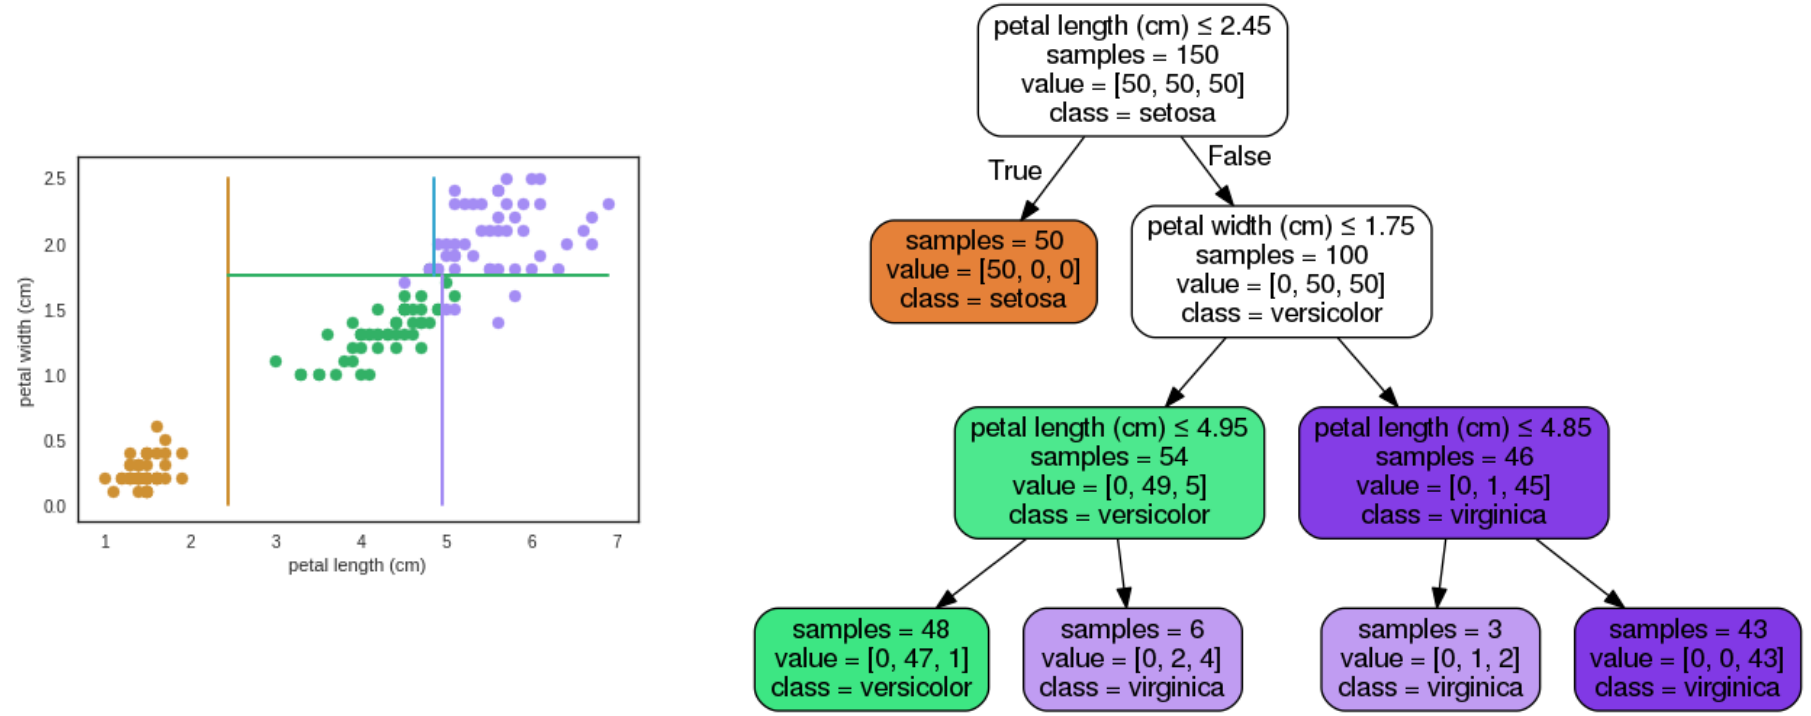

## imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor, export_graphviz
    
from functools import wraps

## Carregando Base de Dados

In [2]:
!rm -r MLUD
!git clone https://github.com/Crissky/MLUD.git

Cloning into 'MLUD'...
remote: Enumerating objects: 158, done.
remote: Counting objects: 100% (158/158), done.
remote: Compressing objects: 100% (148/148), done.
remote: Total 158 (delta 59), reused 38 (delta 4), pack-reused 0
Receiving objects: 100% (158/158), 548.99 KiB | 694.00 KiB/s, done.
Resolving deltas: 100% (59/59), done.


## Funções de Pré-Processamento

In [3]:
def loadDataset(filename):
    baseDeDados = pd.read_csv(filename, delimiter=';')
    X = baseDeDados.iloc[:,:-1].values
    y = baseDeDados.iloc[:,-1].values
    
    return X, y, baseDeDados

def fillMissingData(X, inicioColuna, fimColuna):
    imputer = SimpleImputer(missing_values=np.nan, strategy='median')
    X[:,inicioColuna:fimColuna + 1] = imputer.fit_transform(X[:,inicioColuna:fimColuna + 1])
    
    return X

#só funciona se i = 0 ou i = ultima coluna
def computeCategorization(X, i):
    labelencoder_X = LabelEncoder()
    X[:, i] = labelencoder_X.fit_transform(X[:, i])

    #one hot encoding
    D = pd.get_dummies(X[:,i]).values
    if(i == 0):
        X = X[:,1:]
        X = np.insert(X, 0, D, axis=1)

        #removendo dummy variable trap
        X = X[:,1:]
    else:
        X = X[:,:i]
        for j in range(0, D.shape[1]):
            X = np.insert(X, i, D[:,j], axis=1)

        #removendo dummy variable trap
        X = X[:,:-1]
    
    return X

def splitTrainTestSets(X, y, testSize):
    XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size = testSize)

    return XTrain, XTest, yTrain, yTest

def computeScaling(X):
    scale = StandardScaler()
    X = scale.fit_transform(X)

    return X, scale

## Funções Auxiliares

In [4]:
def showplot(XPoints, yPoints, XLine, yLine):
    plt.scatter(XPoints, yPoints, color='r')
    plt.plot(XLine, yLine, color='b')
    plt.title('Comparando pontos reais com reta produzida pela Regressão com Árvore de Decisão.')
    plt.xlabel('Experiência em anos')
    plt.ylabel('Salário')
    plt.show()

## Regressão com Árvore de Decisão

Site do GraphViz (para visualizar o export_graphviz): https://dreampuf.github.io/GraphvizOnline/

In [5]:
def computeDecisionTreeRegressionModel(X, y):
    regressor = DecisionTreeRegressor()
    regressor.fit(X, y)

    return regressor

def runDecisionTreeRegressionExample(filename):
    start_time = time.time()
    X, y, csv = loadDataset(filename)
    elapsed_time = time.time() - start_time
    print('Load Dataset: %.2f' % elapsed_time, 'segundos.')

    start_time = time.time()
    dtModel = computeDecisionTreeRegressionModel(X, y)
    elapsed_time = time.time() - start_time
    print('Compute Decision Tree Regression: %.2f' % elapsed_time, 'segundos.')

    showplot(X, y, X, dtModel.predict(X))
    export_graphviz(decision_tree=dtModel, out_file='my_tree.dot', feature_names=['Experiência'])

    with open('my_tree.dot', 'r') as my_tree:
        print('\nPrint do arquivo my_tree.dot\n'.upper())
        print(my_tree.read())

Load Dataset: 0.01 segundos.
Compute Decision Tree Regression: 0.00 segundos.


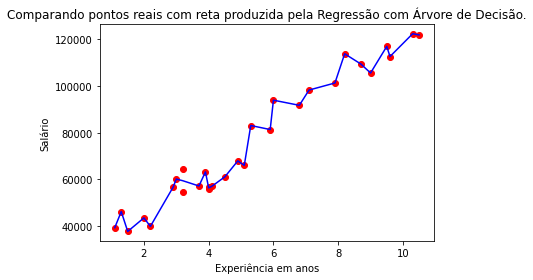


PRINT DO ARQUIVO MY_TREE.DOT

digraph Tree {
node [shape=box] ;
0 [label="Experiência <= 5.2\nmse = 726499261.733\nsamples = 30\nvalue = 76003.0"] ;
1 [label="Experiência <= 2.55\nmse = 88456323.003\nsamples = 17\nvalue = 54570.235"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="Experiência <= 1.4\nmse = 9510987.2\nsamples = 5\nvalue = 41339.0"] ;
1 -> 2 ;
3 [label="Experiência <= 1.2\nmse = 11771761.0\nsamples = 2\nvalue = 42774.0"] ;
2 -> 3 ;
4 [label="mse = 0.0\nsamples = 1\nvalue = 39343.0"] ;
3 -> 4 ;
5 [label="mse = 0.0\nsamples = 1\nvalue = 46205.0"] ;
3 -> 5 ;
6 [label="Experiência <= 1.75\nmse = 5715776.889\nsamples = 3\nvalue = 40382.333"] ;
2 -> 6 ;
7 [label="mse = 0.0\nsamples = 1\nvalue = 37731.0"] ;
6 -> 7 ;
8 [label="Experiência <= 2.1\nmse = 3301489.0\nsamples = 2\nvalue = 41708.0"] ;
6 -> 8 ;
9 [label="mse = 0.0\nsamples = 1\nvalue = 43525.0"] ;
8 -> 9 ;
10 [label="mse = 0.0\nsamples = 1\nvalue = 39891.0"] ;
8 -> 10 ;
11 [label="Experiência

In [6]:
runDecisionTreeRegressionExample('MLUD/Aula09/salary.csv')

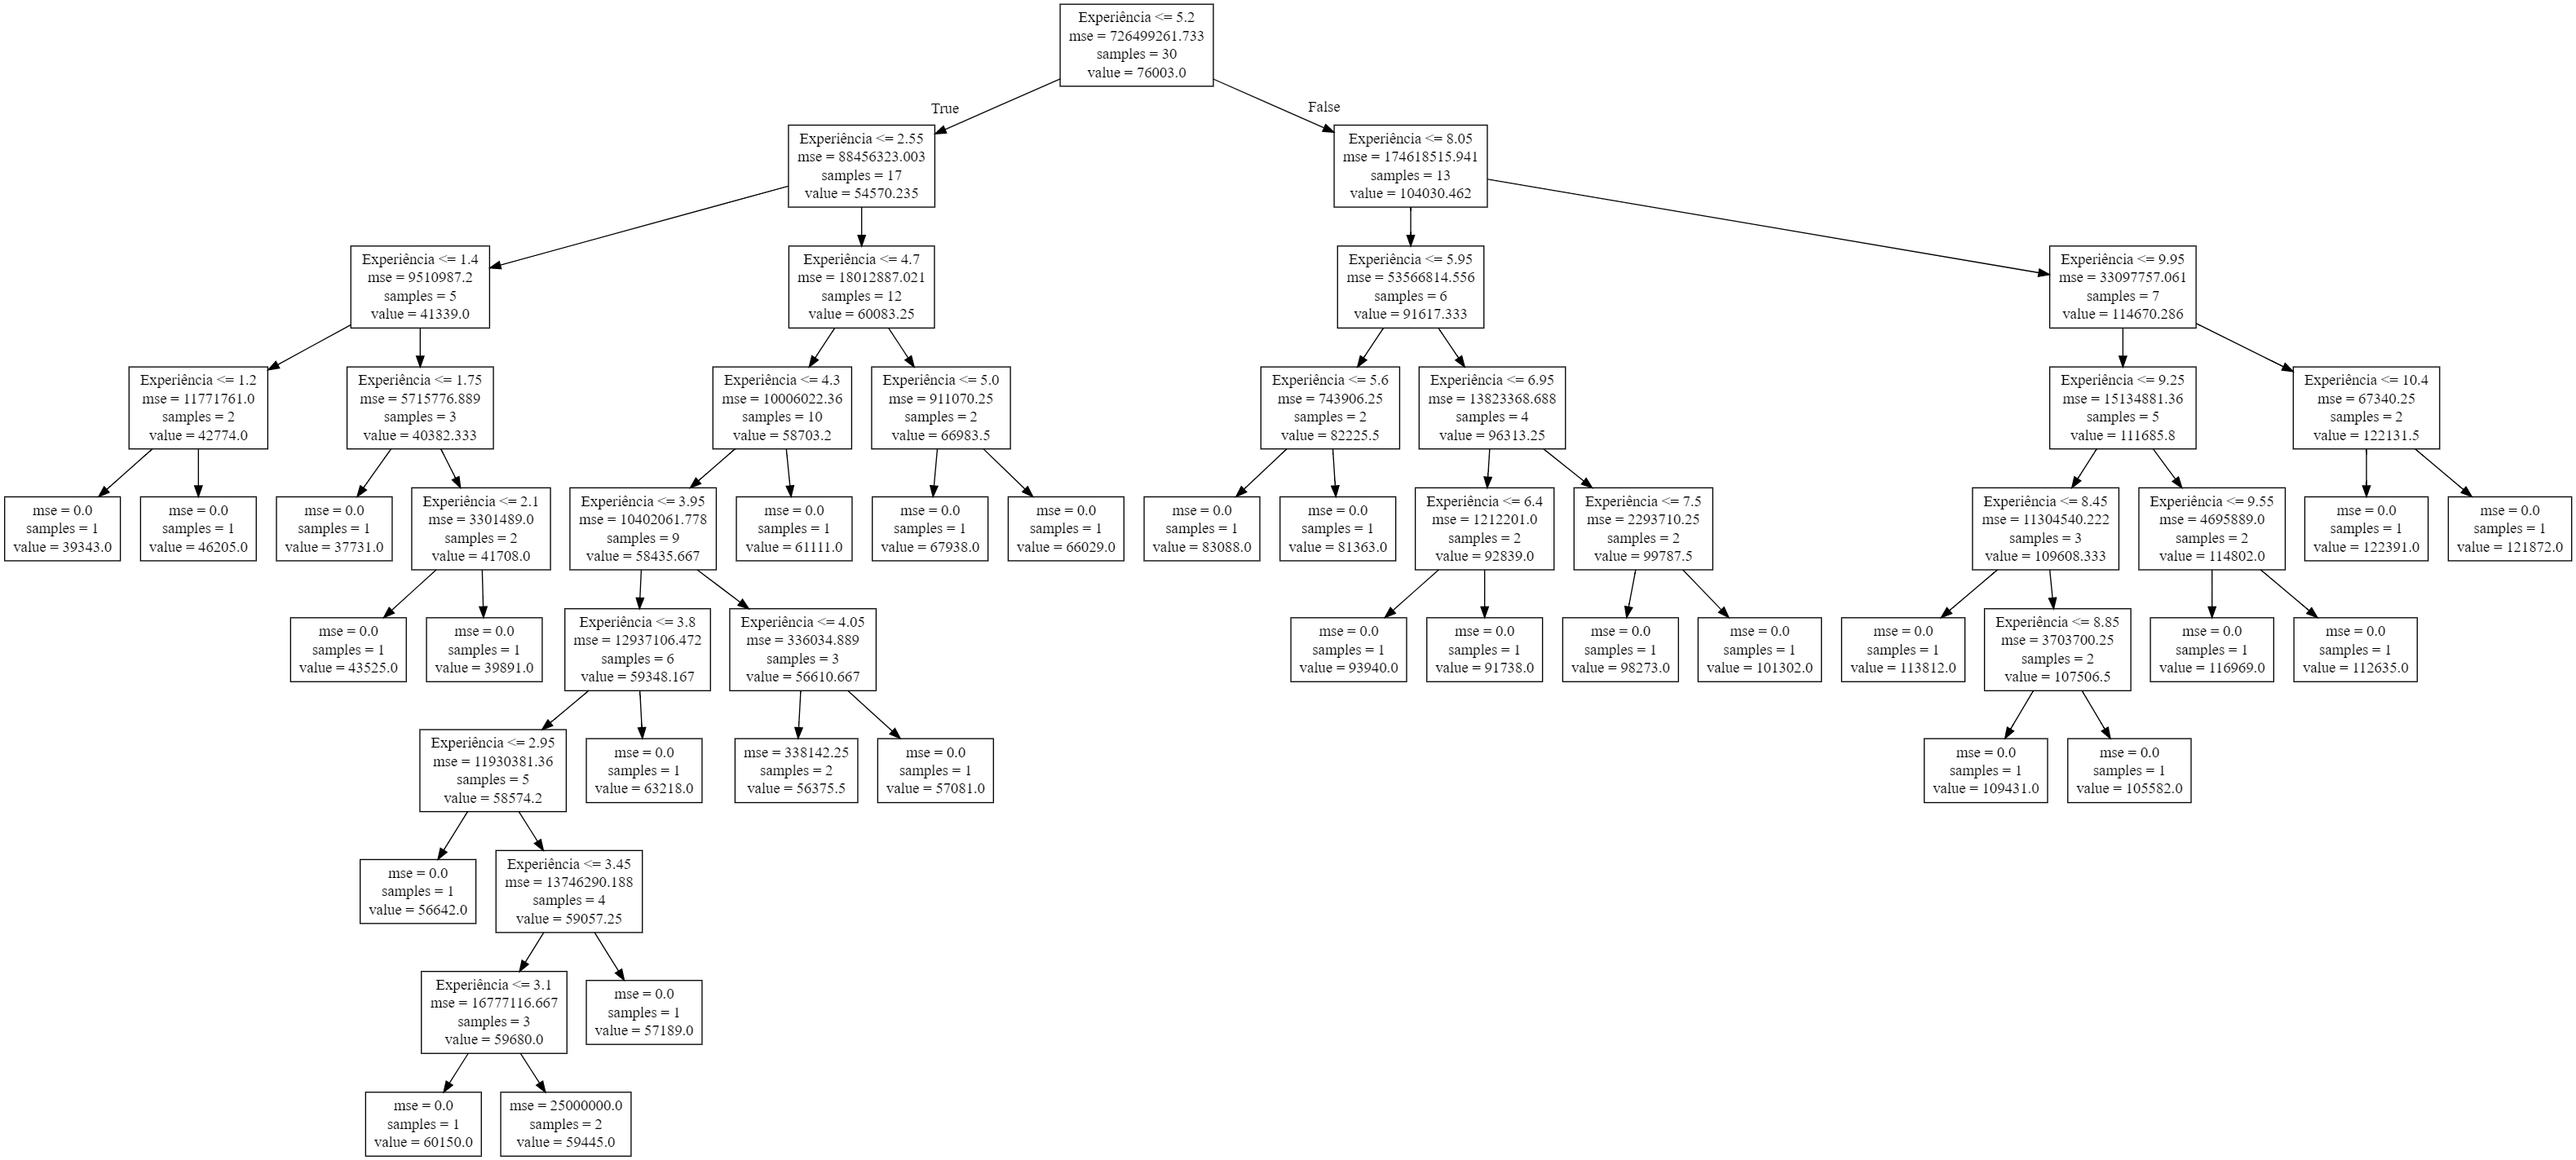

Load Dataset: 0.01 segundos.
Compute Decision Tree Regression: 0.00 segundos.


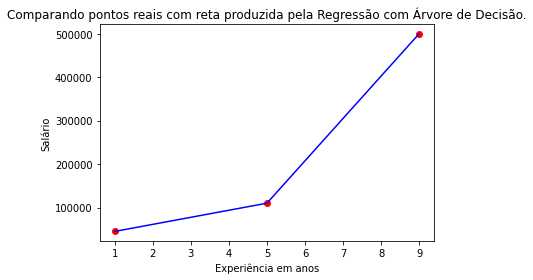


PRINT DO ARQUIVO MY_TREE.DOT

digraph Tree {
node [shape=box] ;
0 [label="Experiência <= 7.0\nmse = 40372222222.222\nsamples = 3\nvalue = 218333.333"] ;
1 [label="Experiência <= 3.0\nmse = 1056250000.0\nsamples = 2\nvalue = 77500.0"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="mse = 0.0\nsamples = 1\nvalue = 45000.0"] ;
1 -> 2 ;
3 [label="mse = 0.0\nsamples = 1\nvalue = 110000.0"] ;
1 -> 3 ;
4 [label="mse = 0.0\nsamples = 1\nvalue = 500000.0"] ;
0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
}


In [7]:
runDecisionTreeRegressionExample('MLUD/Aula09/salary2.csv')

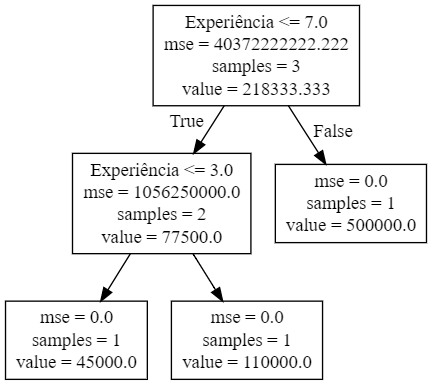

In [12]:
def computeDecisionTreeRegressionModel(X, y):
    regressor = DecisionTreeRegressor()
    regressor.fit(X, y)

    return regressor

def runDecisionTreeRegressionExample(filename):
    start_time = time.time()
    X, y, csv = loadDataset(filename)
    elapsed_time = time.time() - start_time
    print('Load Dataset: %.2f' % elapsed_time, 'segundos.')

    start_time = time.time()
    dtModel = computeDecisionTreeRegressionModel(X, y)
    elapsed_time = time.time() - start_time
    print('Compute Decision Tree Regression: %.2f' % elapsed_time, 'segundos.')

    XGrid = np.arange(min(X), max(X), 0.01)
    XGrid = XGrid.reshape((len(XGrid), 1))

    showplot(X, y, XGrid, dtModel.predict(XGrid))
    export_graphviz(decision_tree=dtModel, out_file='my_tree.dot', feature_names=['Experiência'])

    with open('my_tree.dot', 'r') as my_tree:
        print('\nPrint do arquivo my_tree.dot\n'.upper())
        print(my_tree.read())

Load Dataset: 0.00 segundos.
Compute Decision Tree Regression: 0.00 segundos.


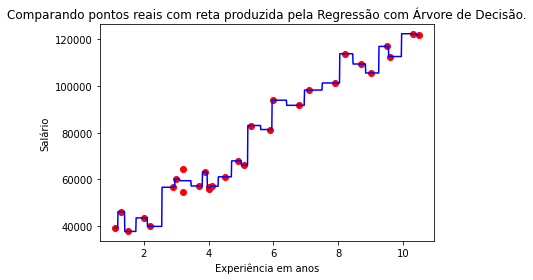


PRINT DO ARQUIVO MY_TREE.DOT

digraph Tree {
node [shape=box] ;
0 [label="Experiência <= 5.2\nmse = 726499261.733\nsamples = 30\nvalue = 76003.0"] ;
1 [label="Experiência <= 2.55\nmse = 88456323.003\nsamples = 17\nvalue = 54570.235"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="Experiência <= 1.4\nmse = 9510987.2\nsamples = 5\nvalue = 41339.0"] ;
1 -> 2 ;
3 [label="Experiência <= 1.2\nmse = 11771761.0\nsamples = 2\nvalue = 42774.0"] ;
2 -> 3 ;
4 [label="mse = 0.0\nsamples = 1\nvalue = 39343.0"] ;
3 -> 4 ;
5 [label="mse = 0.0\nsamples = 1\nvalue = 46205.0"] ;
3 -> 5 ;
6 [label="Experiência <= 1.75\nmse = 5715776.889\nsamples = 3\nvalue = 40382.333"] ;
2 -> 6 ;
7 [label="mse = 0.0\nsamples = 1\nvalue = 37731.0"] ;
6 -> 7 ;
8 [label="Experiência <= 2.1\nmse = 3301489.0\nsamples = 2\nvalue = 41708.0"] ;
6 -> 8 ;
9 [label="mse = 0.0\nsamples = 1\nvalue = 43525.0"] ;
8 -> 9 ;
10 [label="mse = 0.0\nsamples = 1\nvalue = 39891.0"] ;
8 -> 10 ;
11 [label="Experiência

In [13]:
runDecisionTreeRegressionExample('MLUD/Aula09/salary.csv')